<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230821_%EA%B0%95%EC%9D%98%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **4. T검정**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/유비온 강의/data/Ashopping2.csv',sep=',', encoding='CP949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4.1 일표본 t-검정
### 분석 시나리오

작년 A쇼핑의 VIP 고객들의 평균 구매액은 약 700만원 이었으며,
이에 A쇼핑은 올해 VIP 그룹 고객들의 평균 구매액 목표치를 10% 성장한 770만원으로 결정한바 있다.
올해 VIP 고객들의 평균 구매액 목표치인 770만원을 달성하였는지 판단하기 위해 일표본 t-검정을 통해 검정해 보고자 한다.

#### H0 (귀무가설)= A쇼핑 VIP고객들의 총 매출액 평균은  7,700,000원이다.
#### H1 (연구가설)= A쇼핑 VIP 고객들의 총 매출액 평균은  7,700,000원이 아니다.


In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats

#2. 총매출액 평균 및 일표본 t-검정
print('총매출액 평균 : ',df.총_매출액.mean())
print(stats.ttest_1samp(df['총_매출액'], 7700000))

In [ ]:
print('총매출액 평균 : ', df.총_매출액.mean())

총매출액 평균 :  7068689.76


In [ ]:
from scipy import stats
stats.ttest_1samp(df['총_매출액'], 7700000)

TtestResult(statistic=-2.8657430145836003, pvalue=0.0042475861483265475, df=999)

## 4.2 독립표본 t-검정
### 분석 시나리오

A쇼핑의 마케팅 부서는 콜센터를 통해 접수된 클레임고객에 대한 특별한 마케팅을 기획하고자 한다.
클레임고객은 상대적으로 매장을 찾는 횟수가 적어져 이탈위험도가 높을 것이라고 예상되기 때문이다.
이를 위해 클레임 고객과 비클레임 고객간의 매장 방문 횟수가 실제로 차이가 있는지를 먼저 검증해야 한다.

#### H0 (귀무가설)= A쇼핑 클레임고객들과 비클레임 고객들의 방문횟수 차이는 없다.
#### H1 (연구가설)= A쇼핑 클레임고객들과 비클레임 고객들의 방문횟수 차이는 있다.


In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats
import numpy as np

#2. 등분산검정
no_claim = df[df.클레임접수여부== 0]
df2 = np.array(no_claim.방문빈도)
claim = df[df.클레임접수여부== 1]
df3 = np.array(claim.방문빈도)
stats.bartlett(df2,df3)

In [ ]:
no_claim = df[df['클레임접수여부']==0]
claim = df[df['클레임접수여부']==1]

In [ ]:
import numpy as np
type(np.array(df))

numpy.ndarray

In [ ]:
from scipy import stats
import numpy as np
no_claim = np.array(no_claim['방문빈도'])
claim = np.array(claim['방문빈도'])
stats.bartlett(no_claim, claim)

# 귀무가설 : 분산이 같다
# 연구가설 : 분산이 다르다

BartlettResult(statistic=13.626177910965525, pvalue=0.00022305349806448475)

In [ ]:
no_claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,6,6,6,5,5,5,6,6,5
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,5,6,4,6,5,4,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,0,12390390,20,619520,23,380395,1,3,0,...,7,7,6,5,6,7,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
7,8,0,12717240,109,116672,4,354735,1,2,1,...,6,6,5,7,6,6,5,6,6,6
13,14,0,4098600,15,273240,14,334100,2,4,1,...,6,7,6,6,6,4,5,7,6,6
14,15,0,3754700,21,178795,23,380200,2,4,1,...,6,5,6,6,7,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,0,5358350,16,334897,26,364650,1,4,1,...,6,6,5,6,5,5,6,6,6,6
986,987,0,7879000,35,225114,14,333850,1,2,1,...,7,6,7,6,6,4,5,6,6,6
989,990,0,2540870,15,169391,23,379950,2,4,1,...,6,5,5,6,5,6,6,5,5,5
991,992,0,9302490,40,232562,10,304450,1,2,1,...,6,6,6,6,6,6,6,6,6,6


In [ ]:
#1. 독립표본 t-검정 및 방문빈도 평균
print(stats.ttest_ind(df2, df3, equal_var=False))
print('클레임 접수여부(0) 고객 평균방문빈도 : ',no_claim.방문빈도.mean())
print('클레임 접수여부(1) 고객 평균방문빈도 : ',claim.방문빈도.mean())

In [ ]:
stats.ttest_ind(no_claim, claim, equal_var=False)

Ttest_indResult(statistic=2.595726838875684, pvalue=0.009577734932789503)

In [ ]:
np.mean(no_claim)

28.184842883548985

In [ ]:
np.mean(claim)

24.736383442265794

## 4.3 대응표본 t-검정
### 분석 시나리오

A쇼핑 마케팅 팀에서는 그 동안 단순 포인트 적립 및 결제 시 차감 사용 방식으로 운영되어온
멤버십 제도를 등급별 사은품 및 쿠폰 지급 기능이 추가된 전략적인 로열티 프로그램으로 개선하였다.
이를 통한 고객들의 로열티 프로그램 만족도의 변화가 통계적으로 유의한 지 알아보기 위해 고객들의
신규 멤버십 프로그램 도입 전과 도입 후의 고객만족도에 대한 쌍체표본 t-검정을 수행하고자 한다.

#### H0 (귀무가설)= A쇼핑 고객들의 멤버십프로그램 도입 전 만족도와 도입 후 만족도의 차이는 없다.
#### H1 (연구가설)= A쇼핑 고객들의 멤버십프로그램 도입 전 만족도와 도입 후 만족도의 차이는 있다.

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats

#2. 쌍체표본 t-검정
stats.ttest_rel(df['멤버쉽_프로그램_가입후_만족도'],df['멤버쉽_프로그램_가입전_만족도'])

In [ ]:
stats.ttest_rel(df['멤버쉽_프로그램_가입전_만족도'], df['멤버쉽_프로그램_가입후_만족도'])

TtestResult(statistic=-29.560410783358122, pvalue=1.7319140513197275e-138, df=999)

In [ ]:
df['멤버쉽_프로그램_가입전_만족도'].mean()

4.296

In [ ]:
df['멤버쉽_프로그램_가입후_만족도'].mean()

5.524

# **5. 분산분석**


## 5.1 일원분산분석
### 분석 시나리오

A쇼핑 고객들의 구매유형별 총 매출액의 차이가 있는지를 일원분산분석을 통해 검정해 보고자 한다. A쇼핑에서 관리하는 고객들의 구매유형과 고객 수는 다음과 같다.
이를 위한 가설은 다음과 같다.

#### H0 (귀무가설)= A쇼핑 고객의 구매유형에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= A쇼핑 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.

In [ ]:
#1. 모듈 및 데이터 탑재
!pip install pingouin
!pip install scikit-posthocs

In [ ]:
!pip install pingouin

In [ ]:
!pip install scikit-posthocs

In [ ]:
import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
df1=df[['구매유형','총_매출액']]
pd.options.display.float_format = '{:.3f}'.format

#2. 등분산 검정
구매유형 = [ ]
for i in range(1,5,1):
    구매유형.append(df1[df1.구매유형==i].총_매출액)
sp.stats.levene(구매유형[0],구매유형[1], 구매유형[2], 구매유형[3])

In [ ]:
df1 = df[['구매유형', '총_매출액']]
df1

,구매유형,총_매출액
0,4,4007080
1,4,3168400
2,4,2680780
3,4,5946600
4,2,13745950
...,...,...
995,3,5135090
996,2,10315690
997,4,2741290
998,3,11268990


In [ ]:
df1['구매유형'].unique()

array([4, 2, 1, 3])

In [ ]:
구매유형 = []
for i in range(1,5):
    구매유형.append(df1[df1['구매유형']==i])
구매유형

In [ ]:
stats.levene(구매유형[0]['총_매출액'], 구매유형[1]['총_매출액'], 구매유형[2]['총_매출액'], 구매유형[3]['총_매출액'])

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [ ]:
df1.groupby('구매유형').mean()

In [ ]:
df1.groupby('구매유형').mean()

,총_매출액
구매유형,
1,3403682.326
2,9612645.079
3,11779839.653
4,4392794.395


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
#1. Welch 일원분산분석
## 등분산성 가정x
import pingouin as pg
print(pg.welch_anova(dv='총_매출액', between='구매유형', data=df1))

## 등분산성 만족시
#model = ols('총_매출액 ~ 구매유형', data=df1).fit()
#anova_lm(model)

#2. 사후분석
df1['구매유형'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=False))

#3. 구매유형별 평균 총매출액
print(구매유형[0].mean(),구매유형[1].mean(),구매유형[2].mean(),구매유형[3].mean())

In [ ]:
import pingouin as pg
pg.welch_anova(dv='총_매출액', between='구매유형', data=df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.936,88.238,0.000,0.193


In [ ]:
import scikit_posthocs
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True)

,1,2,3,4
1,1.000,0.000,0.000,0.805
2,0.000,1.000,0.008,0.000
3,0.000,0.008,1.000,0.000
4,0.805,0.000,0.000,1.000


In [ ]:
구매유형[0]['총_매출액'].mean()

3403682.3255813955

In [ ]:
구매유형[1]['총_매출액'].mean()

9612645.078864353

In [ ]:
구매유형[2]['총_매출액'].mean()

11779839.652777778

In [ ]:
구매유형[3]['총_매출액'].mean()

4392794.395161291

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('총_매출액 ~ 구매유형', data=df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
구매유형,1.000,3386995098917810.500,3386995098917810.500,74.958,0.000
Residual,998.000,45094574393149120.000,45184944281712.547,NaN,NaN


## 5.2 이원분산분석
### 분석 시나리오

이번에는 구매유형과 거주지역에 따라 고객들의 총 매출액이 다른지 검정해 보자 한다. 이원분산분석의 가설은 제1 독립변수의 효과, 제2 독립변수의 효과, 그리고 상호작용 효과에 대해 논하는 가설로 분리하여 설정하는 것이 바람직하다.

### ① 구매유형에 따른 매출액 차이 가설
#### H0 (귀무가설)= 구매유형에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.

### ② 거주지역에 따른 매출액 차이 가설
#### H0 (귀무가설)= 거주지역에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= 적어도 1개의 거주지역이 다른 거주지역과 총 매출액 차이가 존재한다.

### ③ 독립변수간 상호작용에 대한 가설
#### H0 (귀무가설)= 구매유형과 거주지역의 상호작용 효과는 없다.
#### H1 (연구가설)= 구매유형과 거주지역의 상호작용 효과가 있다.


In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs

df1=df[['총_매출액','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

#2. 이원분산분석
#print(pg.anova(dv='총_매출액', between=['구매유형','거주지역'], data=df1))
model = ols('총_매출액 ~ C(구매유형) * C(거주지역)', data=df1).fit()
print(anova_lm(model))
#3. 사후분석
df1['구매유형'].astype(str)
df1['거주지역'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True))
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역', sort=True))

#4. 구매유형, 거주지역별 평균 총 매출액
pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)

In [ ]:
df1 = df[['총_매출액', '구매유형', '거주지역']]
df1

,총_매출액,구매유형,거주지역
0,4007080,4,6
1,3168400,4,4
2,2680780,4,6
3,5946600,4,5
4,13745950,2,6
...,...,...,...
995,5135090,3,6
996,10315690,2,6
997,2741290,4,4
998,11268990,3,5


In [ ]:
pg.anova(dv='총_매출액', between=['구매유형', '거주지역'], data=df1)

,Source,SS,DF,MS,F,p-unc,np2
0,구매유형,6347752626180900.000,3.000,2115917542060300.000,64.342,0.000,0.165
1,거주지역,16140404571324428.000,6.000,2690067428554071.500,81.801,0.000,0.335
2,구매유형 * 거주지역,3867936213048915.000,18.000,214885345169384.156,6.534,0.000,0.108
3,Residual,32096439113329668.000,976.000,32885695812837.773,NaN,NaN,NaN


In [ ]:
model = ols('총_매출액 ~ C(구매유형) * C(거주지역)', data = df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(구매유형),3.000,9376756399592746.000,3125585466530915.500,95.044,0.000
C(거주지역),6.000,4031991176645000.000,671998529440833.375,20.434,0.000
C(구매유형):C(거주지역),18.000,2988570754726374.000,166031708595909.656,5.049,0.000
Residual,976.000,32096439113329672.000,32885695812837.777,NaN,NaN


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형')

,4,2,1,3
4,1.000,0.000,0.805,0.000
2,0.000,1.000,0.000,0.008
1,0.805,0.000,1.000,0.000
3,0.000,0.008,0.000,1.000


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역')

,6,4,5,7,3,2,1
6,1.000,0.008,0.002,0.000,0.019,0.339,0.988
4,0.008,1.000,1.000,0.000,0.978,0.980,1.000
5,0.002,1.000,1.000,0.000,0.935,0.965,1.000
7,0.000,0.000,0.000,1.000,0.000,0.000,0.412
3,0.019,0.978,0.935,0.000,1.000,1.000,1.000
2,0.339,0.980,0.965,0.000,1.000,1.000,1.000
1,0.988,1.000,1.000,0.412,1.000,1.000,1.000


## 5.3 다변량분산분석
### 분석 시나리오

A쇼핑에서는 다변량분산분석을 통해 구매유형, 거주지역에 따라 방문빈도 및 총 매출액의 차이를 검정하려 한다. 이러한 문제해결을 위해 아래와 같이 가설을 수립할 수 있다.

#### H0 (귀무가설)= A쇼핑 고객의 구매유형,거주지역에 따른 방문빈도,총 매출액의 차이는 없다.
#### H1 (연구가설)= A쇼핑 고객의 구매유형,거주지역에 따른 방문빈도,총 매출액의 차이는 있다.

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

df1=df[['총_매출액','방문빈도','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

#2. 다변량분산분석
print(MANOVA.from_formula('방문빈도 + 총_매출액 ~ 구매유형 + 거주지역 ', data=df1).mv_test())

In [ ]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

df1 = df[['총_매출액', '방문빈도', '구매유형', '거주지역']]
df1

In [ ]:
manova_result = MANOVA.from_formula('방문빈도 + 총_매출액 ~ 구매유형 + 거주지역', data=df1).mv_test()
print(manova_result)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [ ]:
#1. 패키지 불러오기
import scikit_posthocs
import numpy as np

#2. 사후분석
df1['구매유형'].astype(str)
df1['거주지역'].astype(str)
print('구매유형 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True))
print('\n거주지역 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역', sort=True))
print('\n구매유형 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형', sort=True))
print('\n거주지역 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='거주지역', sort=True))

#3. 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n',평균총매출액)
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n',평균방문빈도)

In [ ]:
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
평균방문빈도

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,8.000,8.667,10.818,10.222,9.667,10.000
2,NaN,NaN,29.143,42.312,39.022,48.212,58.845
3,7.750,5.000,7.929,11.903,15.350,20.438,40.765
4,NaN,12.778,12.485,17.277,18.000,18.768,19.966


In [ ]:
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
평균총매출액

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,NaN,NaN,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,NaN,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True)

,1,2,3,4
1,1.000,0.000,0.000,0.805
2,0.000,1.000,0.008,0.000
3,0.000,0.008,1.000,0.000
4,0.805,0.000,0.000,1.000


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역', sort=True)

,1,2,3,4,5,6,7
1,1.000,1.000,1.000,1.000,1.000,0.988,0.412
2,1.000,1.000,1.000,0.980,0.965,0.339,0.000
3,1.000,1.000,1.000,0.978,0.935,0.019,0.000
4,1.000,0.980,0.978,1.000,1.000,0.008,0.000
5,1.000,0.965,0.935,1.000,1.000,0.002,0.000
6,0.988,0.339,0.019,0.008,0.002,1.000,0.000
7,0.412,0.000,0.000,0.000,0.000,0.000,1.000


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형', sort=True)

,1,2,3,4
1,1.000,0.000,0.075,0.030
2,0.000,1.000,0.000,0.000
3,0.075,0.000,1.000,0.998
4,0.030,0.000,0.998,1.000


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='거주지역', sort=True)

,1,2,3,4,5,6,7
1,1.000,1.000,1.000,0.949,0.878,0.451,0.018
2,1.000,1.000,0.999,0.604,0.303,0.005,0.000
3,1.000,0.999,1.000,0.370,0.040,0.000,0.000
4,0.949,0.604,0.370,1.000,0.913,0.000,0.000
5,0.878,0.303,0.040,0.913,1.000,0.000,0.000
6,0.451,0.005,0.000,0.000,0.000,1.000,0.000
7,0.018,0.000,0.000,0.000,0.000,0.000,1.000


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

X = np.hstack(평균방문빈도.values[0:4])
Y = np.hstack(평균총매출액.values[0:4])

#2. 한글깨짐현상 방지
#matplotlib.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', family='NanumBarunGothic')

#3. 평균점 산점도 그리기
labels = []
for i in range(1,5,1):
    for j in range(1,8,1):
        labels.append(str(i)+str(j))

for label, x_count, y_count in zip(labels, X, Y):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count),
                xytext=(5,-5) )

plt.title('평균점 산점도') #차트 제목
plt.xlabel('평균 방문빈도') # X축 이름
plt.ylabel('평균 총매출액') # Y축 이름
plt.plot(X, Y,'o')

Text(0, 0.5, '평균방문빈도')

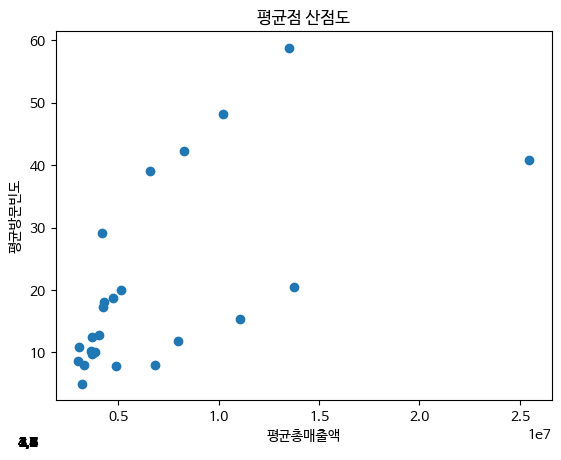

In [ ]:
import matplotlib.pyplot as plt
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
x = np.hstack(평균총매출액.values[0:4])
y = np.hstack(평균방문빈도.values[0:4])

plt.rc('font', family='NanumBarunGothic')

labels = []
for i in range(1,5):
    for j in range(1,8):
        labels.append(str(i) + ',' + str(j))

for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label, xycoords='data', xy=(x_count, y_count), xytext=(5,-5))
plt.plot(x,y,'o')
plt.title('평균점 산점도')
plt.xlabel('평균총매출액')
plt.ylabel('평균방문빈도')

## 5.4 공분산분석

### 분석 시나리오

앞서 거주지역별 총 매출액의 차이가 있는지 일원분산분석을 통해 검증한 적이 있다. 그러나, 총매출액에는 거주지역뿐만 아니라, 고객들의 방문빈도 역시 유의미한 변수일 수 있다. 공분산분석을 통해 방문빈도를 통제한 상태에서 거주지역별 총 매출액의 차이를 검정해보자.

#### H0 (귀무가설)= 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다.
#### H1 (연구가설)= 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다.

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import pingouin as pg

df1=df[['총_매출액','방문빈도','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

#2. 공분산분석
print('공분산분석 결과\n', pg.ancova(dv='총_매출액', between='거주지역',covar='방문빈도', data=df1))

#3. 일원분산분석
print('\n일원분산분석 결과\n', pg.anova(dv='총_매출액', between='거주지역', data=df1))

In [ ]:
df1 = df[['총_매출액', '방문빈도', '거주지역']]
df1

In [ ]:
import pingouin as pg
pg.ancova(dv='총_매출액', between='거주지역', covar='방문빈도', data=df1)

,Source,SS,DF,F,p-unc,np2
0,거주지역,696696841275009.875,6,4.046,0.001,0.024
1,방문빈도,13701443685723036.000,1,477.393,0.000,0.325
2,Residual,28470960329516348.000,992,NaN,NaN,NaN


In [ ]:
pg.anova(dv='총_매출액', between='거주지역', data=df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,거주지역,6,993,24.759,0.000,0.130


# **6. 상관관계분석**

## 6.1 수치형 변수의 상관관계 분석
### 분석 시나리오

A쇼핑은 매출액과 높은 연관성을 지닌 고객 행태 변수가 무엇인지 파악하고자 하며, 이를 위해 일차적으로 방문 빈도와 구매 카테고리 수라는 변수를 선별하였다. 상관관계 분석을 위한 귀무가설과 연구가설은 다음과 같다.

#### H0 (귀무가설)= 총 매출액과 방문빈도,구매 카테고리 수 간의 선형적인 관계가 존재하지 않는다.
#### H1 (연구가설)= 총 매출액과 방문빈도,구매 카테고리 수 간의 선형적인 관계가 존재한다.

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats

df1 = df[['총_매출액','방문빈도','구매_카테고리_수']]

#2. 피어슨 상관계수 출력
print(stats.pearsonr(df1.총_매출액, df1.방문빈도))
print(stats.pearsonr(df1.총_매출액, df1.구매_카테고리_수))
print(stats.pearsonr(df1.방문빈도, df1.구매_카테고리_수))

In [ ]:
df1 = df[['총_매출액', '방문빈도', '구매_카테고리_수']]
df1

In [ ]:
from scipy import stats
stats.pearsonr(df1['총_매출액'], df1['방문빈도'])

PearsonRResult(statistic=0.6311706453193392, pvalue=3.0519604496879027e-112)

In [ ]:
stats.pearsonr(df1['총_매출액'], df1['구매_카테고리_수'])

PearsonRResult(statistic=0.3083469132396713, pvalue=1.812142275681251e-23)

In [ ]:
stats.pearsonr(df1['방문빈도'], df1['구매_카테고리_수'])

PearsonRResult(statistic=0.3958607221846449, pvalue=7.345432750388509e-39)

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats

df1 = df[['총_매출액','방문빈도','구매_카테고리_수']]

#2. 피어슨 상관계수 출력
df1.corr(method = 'pearson')

In [ ]:
df1.corr(method = 'pearson')

,총_매출액,방문빈도,구매_카테고리_수
총_매출액,1.000,0.631,0.308
방문빈도,0.631,1.000,0.396
구매_카테고리_수,0.308,0.396,1.000


## 6.2 편(부분) 상관관계 분석
### 분석 시나리오

앞서 A쇼핑은 총 매출액과 방문빈도, 구매 카테고리 수 간에 유의한 상관관계를 가지고 있고, 특히 매출액과 방문빈도는 매우 높은 상관관계가 있다는 것을 알았다. 그러나, 매출액과 방문빈도간의 상관관계는 구매 카테고리 수에 의해 영향을 받을 수 있다는 의견이 있어 구매 카테고리 수를 통제한 상태에서 매출액과 방문빈도간의 순수한 상관관계를 파악해볼 필요가 있다. 이를 위해 아래와 같이 가설을 수립할 수 있다.

#### H0 (귀무가설)= 구매카테고리 수가  통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형 관계를 갖지 않는다.
#### H1 (연구가설)= 구매카테고리 수가  통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형 관계를 갖는다.

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from pingouin import partial_corr

df1 = df[['총_매출액','방문빈도','구매_카테고리_수']]

#2. 편 상관계수 출력
partial_corr(data=df1, x='총_매출액', y='방문빈도', covar='구매_카테고리_수')

In [ ]:
pg.partial_corr(data=df1, x='총_매출액', y='방문빈도', covar='구매_카테고리_수')

,n,r,CI95%,p-val
pearson,1000,0.583,"[0.54, 0.62]",0.000


## 6.3 순서형 변수의 상관관계 분석
### 분석 시나리오

A 쇼핑은 고객들의 객단가 즉, 1회 평균매출액이 높은 고객 100명과 방문빈도가 높은 고객 100명을 선별하여 특별한 사은행사를 기획하고자 한다. 두 가지 변수를 기준으로 순위를 선정하였을 때 선별된 고객들이 동질적이라면 구태여 두 가지 기준으로 고객을 추출하지 않아도 될 것이다. 이를 위해 수립된 가설은 다음과 같다.

#### H0 (귀무가설)= A쇼핑 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 없다.
#### H1 (연구가설)= A쇼핑 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 있다.

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats

df1 = df[['1회_평균매출액','방문빈도']]

#2. 스피어만 상관계수 출력
stats.spearmanr(df1['1회_평균매출액'],df1['방문빈도'])

In [ ]:
df1 = df[['1회_평균매출액','방문빈도']]
df1

In [ ]:
stats.spearmanr(df1['1회_평균매출액'], df1['방문빈도'])

SignificanceResult(statistic=-0.4988411248473936, pvalue=4.929293870381245e-64)

In [ ]:
df1.corr(method='spearman')

,1회_평균매출액,방문빈도
1회_평균매출액,1.000,-0.499
방문빈도,-0.499,1.000


## 6.4 정준상관분석
### 분석 시나리오

A 쇼핑은 제품 만족도와 매장 만족도 사이에 연관이 있는지 알아보고 이를 마케팅 기획에 참고하고자 한다. 먼저, A 쇼핑 마케팅 팀은 제품 만족도에 해당하는 가격, 디자인, 품질 만족도와 매장 만족도에 해당하는 직원 서비스, 매장 시설, 고객관리 변수에 대한 만족도를 설문 조사한 후, 이 데이터를 바탕으로 제품 만족도 변수 그룹과 매장 만족도 변수 그룹으로 나눠 정준상관분석을 실시하고자 한다. 이를 위해 수립된 가설은 다음과 같다.

#### H0 (귀무가설)= 제품 만족도는 매장 만족도와 연관성이 없다.
#### H1 (연구가설)= 제품 만족도는 매장 만족도와 유의한 상관관계를 가지고 있다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/유비온 강의/data/Ashopping.csv',sep=',', encoding='CP949')
df

In [ ]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
from scipy import stats


df = pd.read_csv('/content/drive/MyDrive/유비온 강의/data/CCA.csv',sep=',', encoding='CP949')

U=df[['품질', '가격', '디자인']]
V=df[['직원 서비스', '매장 시설', '고객관리']]
print(df.head())

#2. 정준변수 구하기
cca = CCA(n_components=1).fit(U, V)
U_c, V_c = cca.transform(U, V)
U_c1=pd.DataFrame(U_c)[0]
V_c1=pd.DataFrame(V_c)[0]
print(U_c)
print('\n',V_c)

#3. 정준상관계수 구하기
CC1=stats.pearsonr(U_c1,V_c1)
print('제1정준상관계수:', CC1)

#4. 정준적재량, 교차적재량 구하기
print('제품 만족도 정준변수와 해당 변수들간 정준적재량:',np.corrcoef(U_c1.T, U.T)[0,1:4])
print('제품 만족도 정준변수와 매장 만족도 변수들간 교차적재량:',np.corrcoef(U_c1.T, V.T)[0,1:])
print('매장 만족도 정준변수와 해당 변수들간 정준적재량:',np.corrcoef(V_c1.T, V.T)[0,1:])
print('매장 만족도 정준변수와 제품 만족도 변수들간 교차적재량:',np.corrcoef(V_c1.T, U.T)[0,1:4])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/유비온 강의/data/CCA.csv', encoding='cp949')
df

,품질,가격,디자인,직원 서비스,매장 시설,고객관리
0,8,10,71,72,9,27
1,83,21,94,63,7,77
2,81,62,74,96,7,32
3,75,74,98,96,3,55
4,34,76,98,84,6,95
5,26,23,76,60,5,11
6,62,22,76,31,9,41
7,17,14,51,45,2,15
8,31,10,71,42,6,19
9,21,13,91,79,4,75


In [ ]:
U = df[['가격', '디자인', '품질']]
V = df[['직원 서비스', '매장 시설', '고객관리']]

In [ ]:
from sklearn.cross_decomposition import CCA

model = CCA(n_components=1).fit(U, V)
U_, V_ = model.transform(U, V)
df_U = pd.DataFrame(U_)
df_V = pd.DataFrame(V_)
df_V

In [ ]:
stats.pearsonr(df_U[0], df_V[0])

PearsonRResult(statistic=0.7717687943183487, pvalue=0.0012226670192390164)

In [ ]:
np.corrcoef(df_U[0].T, U.T)[0,1:4] # 정준적재량

array([0.77461847, 0.55191153, 0.35045604])

In [ ]:
np.corrcoef(df_U[0].T, V.T)[0,1:4] # 교차적재량

array([ 0.70598452, -0.0438384 ,  0.5889048 ])

In [ ]:
np.corrcoef(df_V[0].T, V.T)[0,1:4]

array([ 0.91476168, -0.0568025 ,  0.76305858])

In [ ]:
np.corrcoef(df_V[0].T, U.T)[0,1:4]

array([0.5978383 , 0.42592516, 0.27044132])

# **7.주성분 분석**

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/유비온 강의/data/Ashopping2.csv',sep=',', encoding='CP949')

In [ ]:
from sklearn.decomposition import PCA
df = pd.read_csv('/content/drive/MyDrive/유비온 강의/data/Ashopping2.csv', encoding='CP949')
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              841 non-null    int64  
 1   이탈여부              841 non-null    int64  
 2   총_매출액             841 non-null    int64  
 3   방문빈도              841 non-null    int64  
 4   1회_평균매출액          841 non-null    int64  
 5   할인권_사용 횟수         841 non-null    int64  
 6   총_할인_금액           841 non-null    int64  
 7   고객등급              841 non-null    int64  
 8   구매유형              841 non-null    int64  
 9   클레임접수여부           841 non-null    int64  
 10  구매_카테고리_수         841 non-null    int64  
 11  거주지역              841 non-null    int64  
 12  성별                841 non-null    int64  
 13  고객_나이대            841 non-null    int64  
 14  거래기간              841 non-null    int64  
 15  할인민감여부            841 non-null    int64  
 16  멤버쉽_프로그램_가입전_만족도  841 non-null    int64  
 1

In [ ]:
df=df.dropna(axis=0)
df

In [ ]:
df = df.dropna(axis=0)
df

In [ ]:
df.info()

In [ ]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,6,6,6,5,5,5,6,6,5
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,5,6,4,6,5,4,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,0,12390390,20,619520,23,380395,1,3,0,...,7,7,6,5,6,7,6,6,6,6
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['고객ID', '이탈여부', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
            '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대',
            '거래기간', '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도',
            'Recency', 'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질', '상품_다양성',
            '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성', '시야_확보성', '음향_적절성',
            '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'
            ]
x = df.drop(['총_매출액'], axis=1).values # 독립변인들의 value값만 추출
y = df['총_매출액'].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=features)
x

In [ ]:
df.drop(['총_매출액'], axis=1).columns

Index(['고객ID', '이탈여부', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액', '고객등급',
       '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
feature = df.drop(['총_매출액'], axis=1).columns

x = df.drop(['총_매출액'], axis=1).values
y = df['총_매출액'].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=feature)
x

,고객ID,이탈여부,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,-1.732,-0.267,-0.442,-0.350,-1.803,-2.584,-0.606,0.906,-0.908,0.728,...,0.305,1.360,0.388,0.248,0.369,0.709,0.576,0.366,0.635,0.674
1,-1.722,-0.267,-0.442,0.138,-1.803,-2.587,-0.606,0.906,1.101,-0.111,...,0.305,0.189,-0.977,0.248,0.369,0.709,0.576,0.366,-0.622,0.674
2,-1.718,-0.267,2.241,-0.553,-0.847,-0.420,-0.606,-1.107,-0.908,0.728,...,-0.922,0.189,0.388,0.248,-0.872,-0.373,0.576,0.366,-0.622,0.674
3,-1.715,-0.267,-0.010,-0.811,0.467,0.494,-0.606,0.906,-0.908,-0.111,...,0.305,0.189,0.388,0.248,-0.872,-0.373,-0.433,0.366,0.635,-0.675
4,-1.711,-0.267,-0.969,0.331,1.661,0.789,-0.606,-2.114,-0.908,0.728,...,-2.148,-0.981,0.388,-2.312,0.369,-0.373,-1.442,-0.865,-0.622,-2.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1.697,-0.267,-0.298,1.291,0.825,0.784,-0.606,-0.101,-0.908,1.568,...,1.531,1.360,0.388,-1.032,0.369,1.791,0.576,0.366,0.635,0.674
837,1.701,-0.267,-0.873,1.387,-1.564,-2.234,-0.606,-0.101,1.101,0.728,...,0.305,0.189,1.753,0.248,1.610,0.709,0.576,0.366,0.635,0.674
838,1.704,-0.267,1.091,-0.458,-1.205,-0.957,-0.606,-1.107,-0.908,0.728,...,0.305,1.360,0.388,-1.032,0.369,-0.373,1.585,0.366,0.635,0.674
839,1.711,-0.267,-0.537,1.855,0.467,0.490,-0.606,-0.101,-0.908,-0.111,...,-0.922,-2.151,-2.343,-2.312,-2.114,-1.455,-0.433,-0.865,-1.879,-2.024


In [ ]:
pca = PCA(random_state=1107)
X_p = pca.fit_transform(x)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca = PCA(random_state=1)
X_p = pca.fit_transform(x)

pca.explained_variance_ratio_

array([1.62329479e-01, 1.21565834e-01, 6.97507700e-02, 5.80648925e-02,
       5.02134681e-02, 4.36169233e-02, 3.93011483e-02, 3.74986746e-02,
       3.45930523e-02, 2.89140784e-02, 2.72079134e-02, 2.55501099e-02,
       2.48824275e-02, 2.40964959e-02, 2.10394038e-02, 2.00326014e-02,
       1.93279651e-02, 1.75138298e-02, 1.69093454e-02, 1.51443333e-02,
       1.50109128e-02, 1.40443331e-02, 1.29810274e-02, 1.23310963e-02,
       1.19445483e-02, 1.19276122e-02, 1.05273564e-02, 8.98721390e-03,
       8.48108721e-03, 7.31732190e-03, 6.56667875e-03, 5.46665569e-03,
       5.34224026e-03, 3.82218737e-03, 3.54572120e-03, 2.40112472e-03,
       1.75013653e-03, 3.20138449e-32])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.16232948, 0.28389531, 0.35364608, 0.41171098, 0.46192444,
       0.50554137, 0.54484252, 0.58234119, 0.61693424, 0.64584832,
       0.67305623, 0.69860634, 0.72348877, 0.74758527, 0.76862467,
       0.78865727, 0.80798524, 0.82549907, 0.84240841, 0.85755275,
       0.87256366, 0.88660799, 0.89958902, 0.91192012, 0.92386466,
       0.93579228, 0.94631963, 0.95530685, 0.96378793, 0.97110526,
       0.97767193, 0.98313859, 0.98848083, 0.99230302, 0.99584874,
       0.99824986, 1.        , 1.        ])

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

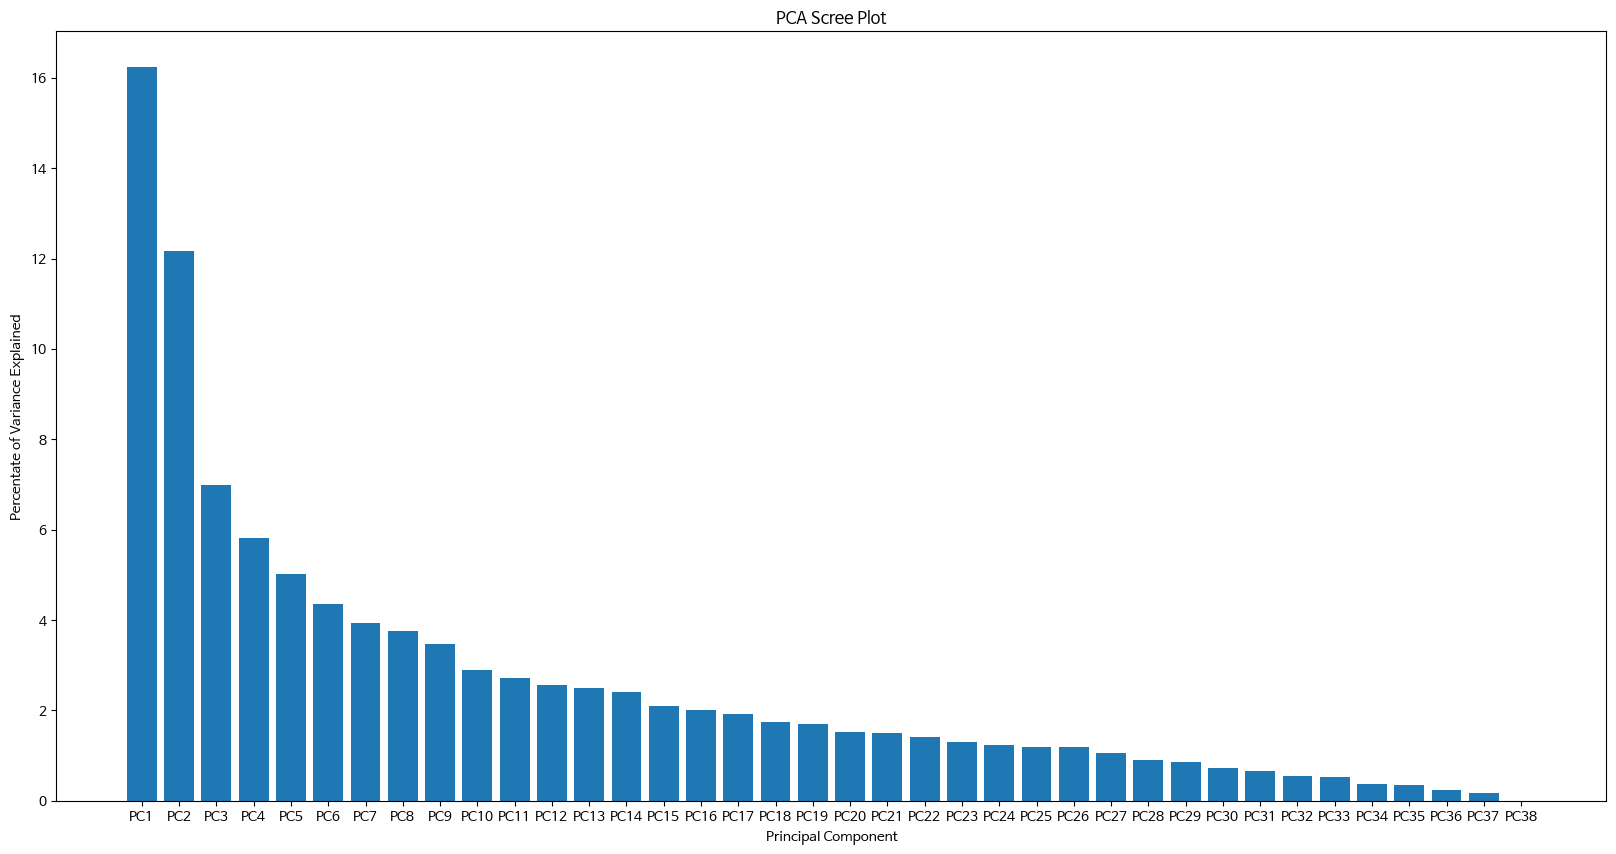

In [ ]:
import matplotlib.pyplot as plt

percent_variance = np.round(pca.explained_variance_ratio_*100, 2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
fig = plt.figure(figsize=(20,10))
#fig.set_size_inches(20,10)
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2',
                                                                 'principal component3', 'principal component4',
                                                                 'principal component5', 'principal component6',
                                                                 'principal component7', 'principal component8',
                                                                 'principal component9'
                                                                 ]) # 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
pca = PCA(n_components=9)
PC = pca.fit_transform(x)
pc_df = pd.DataFrame(data=PC, columns=['pc1', 'pc2','pc3', 'pc4','pc5',
                                       'pc6','pc7', 'pc8', 'pc9'])
pc_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-3.144,0.147,-0.613,1.133,3.287,-0.582,0.224,0.078,0.248
1,-0.411,-0.926,-0.973,-1.125,2.891,-0.261,-1.303,-0.248,-1.313
2,-0.381,3.514,0.456,-0.075,0.647,1.637,-1.452,-0.576,2.044
3,-2.241,1.239,-0.605,2.685,-0.349,0.198,1.951,-0.998,-0.101
4,4.259,-0.430,0.019,-1.881,-1.479,-1.206,1.277,0.999,0.961
...,...,...,...,...,...,...,...,...,...
836,-2.987,1.319,0.479,-1.014,-0.568,-0.550,0.474,2.022,0.525
837,-1.649,-2.179,-1.147,-1.467,2.510,-0.407,-0.583,3.763,-0.445
838,-2.389,1.843,0.334,-1.289,1.399,1.203,-0.484,-0.980,1.678
839,5.868,1.084,0.034,-0.347,-0.130,-0.265,-0.475,2.220,0.902


In [ ]:
pca.explained_variance_ratio_

array([0.16232948, 0.12156583, 0.06975058, 0.05806416, 0.05021299,
       0.04361022, 0.03928644, 0.03747916, 0.03452891])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.16232948, 0.28389531, 0.35364588, 0.41171005, 0.46192304,
       0.50553326, 0.5448197 , 0.58229887, 0.61682778])

In [ ]:
pca.explained_variance_ratio_

In [ ]:
principalDf

In [ ]:
sum(pca.explained_variance_ratio_)

# **8. 요인분석**

In [ ]:
!pip install factor-analyzer

In [ ]:
!pip install factor-analyzer

In [ ]:
from factor_analyzer import FactorAnalyzer
items = x.columns.tolist()
items.sort()
fa = FactorAnalyzer(n_factors=8, method="ml", rotation="promax")
fa.fit(x[items])

In [ ]:
x[items]

In [ ]:
from factor_analyzer import FactorAnalyzer
items = x.columns.tolist()
items.sort()
fa = FactorAnalyzer(n_factors=8, method='ml', rotation='promax')
fa.fit(x[items])

In [ ]:
result = pd.DataFrame(fa.loadings_, index=items)
result

,0,1,2,3,4,5,6,7
1회_평균매출액,-0.026,-0.043,0.049,-0.141,0.045,0.034,-0.058,0.773
Frequency,-0.088,-0.007,0.080,0.870,0.008,0.041,-0.025,-0.171
Monetary,-0.056,0.030,0.211,0.650,0.051,0.084,-0.113,0.594
Recency,0.027,1.009,0.137,-0.088,0.056,0.006,-0.043,0.044
가격_적절성,0.696,0.021,-0.007,-0.021,-0.131,0.039,0.004,-0.003
거래기간,0.036,0.955,0.162,0.028,0.039,0.013,-0.034,0.029
거주지역,0.011,0.136,0.970,0.153,0.002,0.040,0.028,0.041
고객ID,-0.016,-0.043,0.071,-0.063,-0.023,-0.002,0.011,0.013
고객_나이대,-0.053,0.029,-0.000,0.046,-0.045,-0.097,0.059,0.009
고객등급,0.001,-0.126,-0.800,-0.050,-0.041,0.008,-0.058,0.019


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


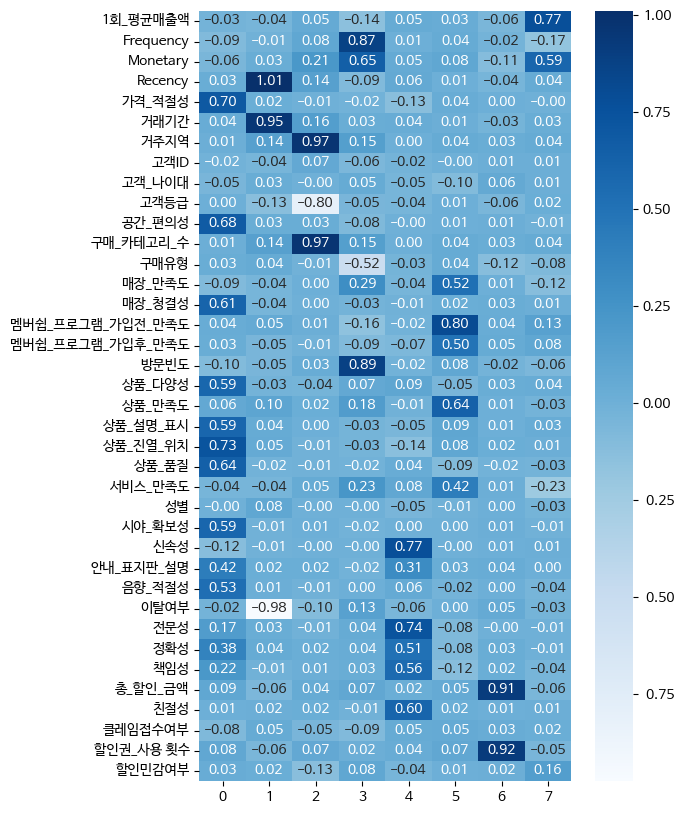

In [ ]:
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(6,10))
sns.heatmap(result, cmap='Blues', annot=True, fmt='.2f')

In [ ]:
fa_0 = result[(result[0]<=-0.4) | (result[0]>=0.4)][0].index

Index(['가격_적절성', '공간_편의성', '매장_청결성', '상품_다양성', '상품_설명_표시', '상품_진열_위치', '상품_품질',
       '시야_확보성', '안내_표지판_설명', '음향_적절성'],
      dtype='object')

In [ ]:
fa_1 = result[(result[1]<=-0.4) | (result[1]>=0.4)][1].index
fa_1

Index(['Recency', '거래기간', '이탈여부'], dtype='object')